In [137]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import os.path as path
import urllib.request

In [3]:
file = 'MinimosCuadrados_7.csv'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Sigmoid.csv'
if not path.exists(file):
    Path_ = urllib.request.urlretrieve(url,file)
else:
    print('---File Found---')
    Path_ = file

---File Found---


In [4]:
Data = pd.read_csv(Path_,sep=',')

In [5]:
Data

,x,y
0,-3.186022,-0.126490
1,0.392737,3.396318
2,-4.817696,-0.032391
3,-1.577942,0.069783
4,-8.935573,0.017409
5,-0.592758,0.727137
6,4.934335,4.475377
7,-7.722024,0.024865
8,5.616402,4.506522
9,-5.407019,0.011716


In [6]:
x_values = np.float64(Data['x'])
y_values = np.float64(Data['y'])

In [28]:

def GetFit(x,theta=param):
       
    M = theta[0]/( theta[1] + np.e**(-theta[2]*x) )
    
    return M


In [60]:

def GetChi2(x,y,t1,t2,t3,sigma=1):
        
    return np.sum( ( (y - GetFit(x,[t1,t2,t3]))/sigma  )**2 )
    
    
    

In [152]:

def Gradient(x,y,theta,h=0.001):
    Gradient = np.zeros(3)

    d1 = ( GetChi2(x,y,theta[0]+h,theta[1],theta[2]) - GetChi2(x,y,theta[0]-h,theta[1],theta[2]) ) / (2*h)
    Gradient[0] = d1
    
    d2 = ( GetChi2(x,y,theta[0],theta[1]+h,theta[2]) - GetChi2(x,y,theta[0],theta[1]-h,theta[2]) ) / (2*h)
    Gradient[1] = d2
    
    d3 = ( GetChi2(x,y,theta[0],theta[1],theta[2]+h) - GetChi2(x,y,theta[0],theta[1],theta[2]-h) ) / (2*h)
    Gradient[2] = d3
    
    return Gradient


def GradientDescent(theta,lr=1e-3,epochs=int(1e4),error=0.01):
    
    d = 1
    it = 0
    
    Point = theta.copy()
    
    while d > error and it < epochs:
        
        Grad = Gradient(x_values,y_values,Point)
        
        Point = Point - np.float64(lr*Grad)
        
        
        
        d = np.linalg.norm((( Point - np.linalg.norm(GetFit(x_values)) )/(np.linalg.norm(GetFit(x_values)))) )
    
            
        it += 1
        
    return Point,d

In [153]:
BestFit,_ = GradientDescent(param)

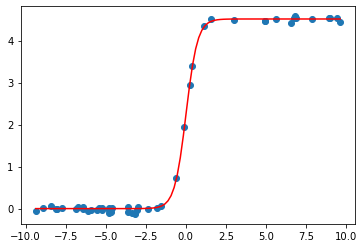

In [154]:

plt.scatter(x_values,y_values)

x_ = np.linspace(np.min(x_values),np.max(x_values),100)
plt.plot(x_,GetFit(x_,BestFit),color='r')

In [155]:
BestFit

array([4.35766364, 0.96547562, 2.79287702])